In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [108]:
df = pd.read_csv('data.csv')

In [109]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [110]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [111]:
df.shape

(569, 33)

In [112]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [114]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

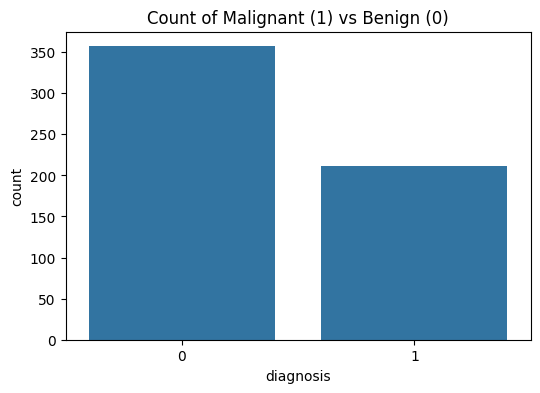

In [115]:
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df)
plt.title('Count of Malignant (1) vs Benign (0)')
plt.savefig('class_distribution.png')

In [116]:
df['diagnosis'].value_counts() # Graph plot krne se accha ye karlo !!

,count
diagnosis,
0,357
1,212


In [117]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [119]:
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

SVC()

In [120]:
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))

[[106   2]
 [  2  61]]


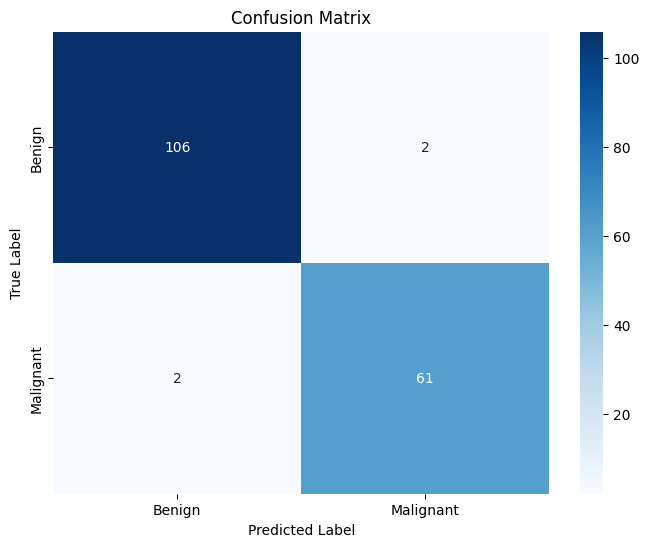

In [121]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix_plot.png')

In [122]:
accuracy = model.score(X_test, y_test)
print(f"Overall Model Accuracy: {accuracy * 100:.2f}%")

Overall Model Accuracy: 97.66%


# **LOGISTIC REGRESSION**

In [123]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [124]:
lr_train_acc = lr_model.score(X_train, y_train)
lr_test_acc = lr_model.score(X_test, y_test)

print(f"Logistic Regression Training Accuracy: {lr_train_acc * 100}%")
print(f"Logistic Regression Testing Accuracy: {lr_test_acc * 100:}%")

Logistic Regression Training Accuracy: 98.74371859296483%
Logistic Regression Testing Accuracy: 98.24561403508771%


# **PREDICTION SYSTEM**

In [125]:
sample_input = [
    17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
    1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003,
    0.006193, 25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189
]

def predict_cancer(input_data):
    input_as_numpy = np.asarray(input_data)
    input_reshaped = input_as_numpy.reshape(1, -1)
    std_data = scaler.transform(input_reshaped)
    prediction = lr_model.predict(std_data)

    if prediction[0] == 0:
        return 'The breast cancer is Benign'
    else:
        return 'The breast cancer is Malignant'

In [126]:
print(predict_cancer(sample_input))

The breast cancer is Malignant


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
